In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

import src.util as utils
import importlib
importlib.reload(utils)

<module 'src.util' from '/Users/tomas/PycharmProjects/uib-machine-learning/assignment-2/src/util.py'>

In [6]:
X = np.load("./data/emnist_hex_images.npy")
y = np.load("./data/emnist_hex_labels.npy")

In [7]:
downsampled_X, downsampled_y, unique_classes_downsampled, class_counts_downsampled = utils.downsampling(X, y)

In [8]:
# Sample a smaller portion of the data (e.g., 10,000 samples)
# Ideal sample size Sample linear model -> sample_size = 8700 -> 88,5%
# Ideal sample size Sample linear model (balanced data set) -> sample_size = 1000 -> 84-87%
sample_size = 10000
X_sampled, _, y_sampled, _ = train_test_split(downsampled_X, downsampled_y, train_size=sample_size, stratify=downsampled_y, random_state=42)

# Preprocessing step: Flattening of images to a 1D Array
X_flattened = X_sampled.reshape(X_sampled.shape[0], -1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_flattened, y_sampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train SVM model using training and validation data
# model_SVM = SVC(kernel='linear') #-> > 87% validation accuracy
model_SVM = SVC(kernel='poly', degree=3, gamma='auto', coef0=0.0) #-> poly leader with always over 90% validation accuracy


In [9]:
# Model training
model_SVM.fit(X_train, y_train)

# Predictions on validation data
svm_prediction = model_SVM.predict(X_val)

# Evaluation on validation data
val_accuracy = accuracy_score(y_val, svm_prediction)
val_classification_report = classification_report(y_val, svm_prediction)

# Print validation evaluation results
print("Validation Accuracy: ", val_accuracy)
#print("Validation Classification Report: ")
#print(val_classification_report)


Validation Accuracy:  0.9093333333333333


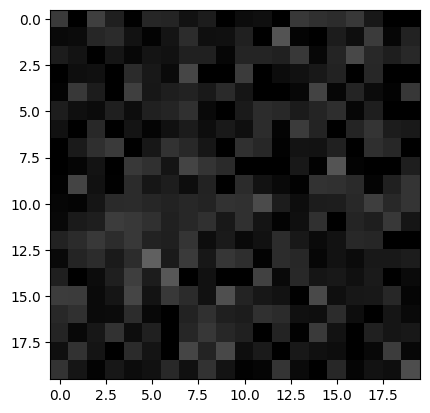

Predicted Class: 16


In [10]:
# Testing functionality with manual testing
# Choose a random index from the validation set
random_index = np.random.randint(0, len(X_val))

# Display the image
plt.imshow(X_val[random_index].reshape(20, 20), vmin=0, vmax=255, cmap="gray")
plt.show()

# Predict the class using the trained model
predicted_class = model_SVM.predict(X_val[random_index].reshape(1, -1))

# Print the predicted class
print("Predicted Class:", predicted_class[0])

# Predictions on validation data
svm_prediction = model_SVM.predict(X_val)

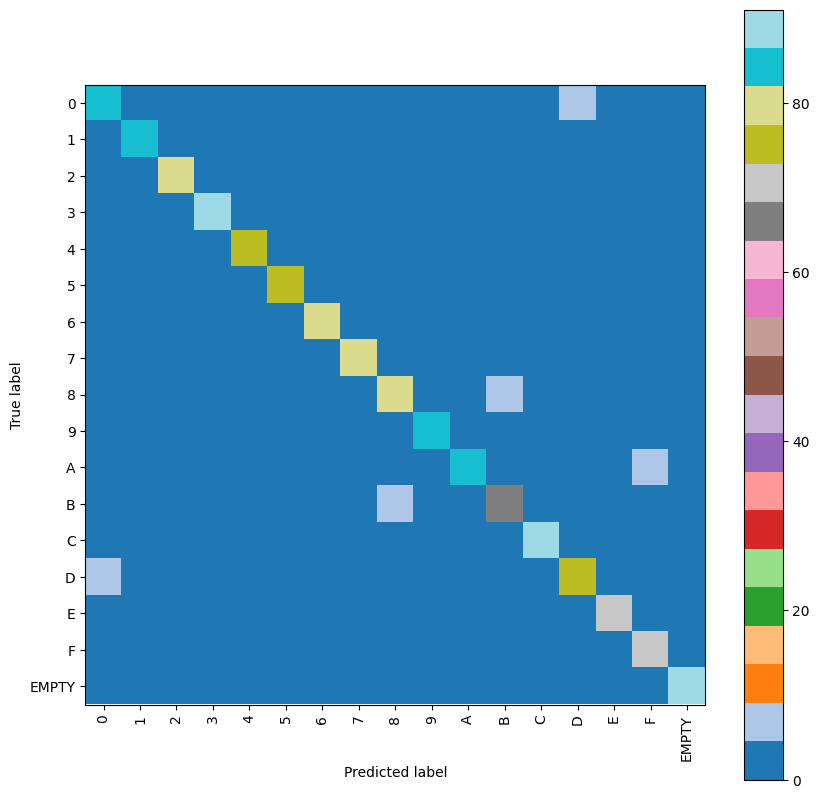

In [11]:
# Creation of a confusion matrix

from src.util import translate_label_to_class
cm = metrics.confusion_matrix(y_val, svm_prediction)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
# Get unique labels from y_val
labels = np.unique(y_val)

# Translate each unique label to its corresponding class
class_labels = [translate_label_to_class(label) for label in labels]
tick_marks = np.arange(len(class_labels))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.tab20)
plt.colorbar()
_ = plt.xticks(tick_marks, class_labels, rotation=90)
_ = plt.yticks(tick_marks, class_labels)
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

In [14]:
import os

# List of SVM models to try
svm_models = {
    'Sigmoid_00': SVC(kernel='sigmoid', gamma=0.01, coef0=0.0),
    'Sigmoid_01': SVC(kernel='sigmoid', gamma=0.01, coef0=0.0), 
    'Sigmoid_02': SVC(kernel='sigmoid', gamma=0.1, coef0=0.0), 
    'Sigmoid_03': SVC(kernel='sigmoid', gamma=1.0, coef0=0.0), 
    'Sigmoid_04': SVC(kernel='sigmoid', gamma=0.01, coef0=1.0), 
    'Sigmoid_05': SVC(kernel='sigmoid', gamma=0.1, coef0=1.0),
    'Sigmoid_06': SVC(kernel='sigmoid', gamma=0.3, coef0=0.5), 
    'Linear': SVC(kernel='linear'),
    'RBF_00': SVC(kernel='rbf', gamma=0.1),
    'RBF_01': SVC(kernel='rbf', gamma=0.01),
    'RBF_02': SVC(kernel='rbf', gamma=1.0),
    'RBF_03': SVC(kernel='rbf', gamma=0.001),
    'RBF_04': SVC(kernel='rbf', gamma=0.0001),
    'RBF_05': SVC(kernel='rbf', gamma=0.25),
    'RBF_06': SVC(kernel='rbf', gamma=0.5),
    'RBF_07': SVC(kernel='rbf', gamma=0.75),
    'Poly_00': SVC(kernel='poly', degree=3),
    'Poly_01': SVC(kernel='poly', degree=3, gamma='scale', coef0=0.0),
    'Poly_02': SVC(kernel='poly', degree=4, gamma='scale', coef0=0.0),
    'Poly_03': SVC(kernel='poly', degree=2, gamma='scale', coef0=0.0),
    'Poly_04': SVC(kernel='poly', degree=3, gamma='scale', coef0=1.0)
}

trained_models = {}

# Create a directory to store confusion matrices
confusion_matrices_dir = 'confusion_matrices'
os.makedirs(confusion_matrices_dir, exist_ok=True)

# Iterate through each SVM model and generate confusion matrix
i = 0
for model_name, model in svm_models.items():
    i = i + 1
    print("Training Model " + model_name)
    # Train the model
    model.fit(X_train, y_train)
    
    # Save the trained model
    trained_models[model_name] = model
    
    # Predictions on validation data
    svm_prediction = model.predict(X_val)

    # Create a confusion matrix
    cm = metrics.confusion_matrix(y_val, svm_prediction)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 10))
    labels = np.unique(y_val)
    # Translate each unique label to its corresponding class
    class_labels = [translate_label_to_class(label) for label in labels]
    tick_marks = np.arange(len(class_labels))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.tab20)
    plt.colorbar()
    _ = plt.xticks(tick_marks, class_labels, rotation=90)
    _ = plt.yticks(tick_marks, class_labels)
    plt.title(f'Confusion Matrix for {model_name} SVM')
    
    # Save the confusion matrix
    matrix_filename = os.path.join(confusion_matrices_dir, f'confusion_matrix_{model_name}.png')
    plt.savefig(matrix_filename, dpi=300)
    plt.close()

# Display a message indicating successful completion
print('Confusion matrices saved in the directory:', confusion_matrices_dir)

Training Model Sigmoid_00
Training Model Sigmoid_01
Training Model Sigmoid_02
Training Model Sigmoid_03
Training Model Sigmoid_04
Training Model Sigmoid_05
Training Model Sigmoid_06
Training Model Linear
Training Model RBF_00
Training Model RBF_01
Training Model RBF_02
Training Model RBF_03
Training Model RBF_04
Training Model RBF_05
Training Model RBF_06
Training Model RBF_07
Training Model Poly_00
Training Model Poly_01
Training Model Poly_02
Training Model Poly_03
Training Model Poly_04
Confusion matrices saved in the directory: confusion_matrices


In [ ]:
# Visualize the accuracy and loss of each model

# create a plot
plt.figure(figsize=(20, 10))
plt.title('Accuracy and Precision Accuracy of SVM Models')
plt.xlabel('Accuracy')
plt.ylabel('Precision')
plt.xticks(rotation=90)

# loop over each model and plot the accuracy and validation accuracy, add each model as a point
for model_name, model in trained_models.items():
    # Predictions on validation data
    svm_prediction = model.predict(X_val)
    
    # Calculate the accuracy and validation accuracy
    accuracy = accuracy_score(y_val, svm_prediction)
    precision = metrics.precision_score(y_val, svm_prediction, average='weighted')
    
    # Plot the accuracy and validation accuracy for the model
    plt.scatter(accuracy, precision)
    plt.annotate(model_name, (accuracy, precision))

# save the plot
plt.savefig('svm_accuracy_precision_plot.png', dpi=300)
plt.close()

In [ ]:
# Visualize the accuracy and loss of each model

# create a plot
plt.figure(figsize=(20, 10))
plt.title('Accuracy and Precision Accuracy of SVM Models')
plt.xlabel('Accuracy')
plt.ylabel('Precision')
plt.xticks(rotation=90)

# loop over each model and plot the accuracy and validation accuracy, add each model as a point
for model_name, model in trained_models.items():
    # Predictions on validation data
    svm_prediction = model.predict(X_val)
    
    # Calculate the accuracy and validation accuracy
    accuracy = accuracy_score(y_val, svm_prediction)
    precision = metrics.precision_score(y_val, svm_prediction, average='weighted')
    
    # Plot the accuracy and validation accuracy for the model
    plt.scatter(accuracy, precision)
    plt.annotate(model_name, (accuracy, precision))

# save the plot
plt.savefig('svm_accuracy_precision_plot.png', dpi=300)
plt.close()

In [22]:
# Visualize the accuracy and loss of each model
from sklearn.metrics import precision_score

# create a plot
plt.figure(figsize=(20, 10))
plt.title('Accuracy and Precision Accuracy of SVM Models')
plt.xlabel('Accuracy')
plt.ylabel('Precision')
plt.xticks(rotation=90)

# loop over each model and plot the accuracy and validation accuracy, add each model as a point
for model_name, model in trained_models.items():
    # Predictions on validation data
    svm_prediction = model.predict(X_val)
    
    # Calculate the accuracy and validation accuracy
    accuracy = accuracy_score(y_val, svm_prediction)
    # calculate true_labels and predicted_labels
    true_labels = y_val
    predicted_labels = svm_prediction
    
    precision = precision_score(true_labels, predicted_labels, average='weighted')    
    # Plot the accuracy and validation accuracy for the model
    plt.scatter(accuracy, precision)
    plt.annotate(model_name, (accuracy, precision))

# save the plot
plt.savefig('svm_accuracy_precision_plot.png', dpi=300)
plt.close()

/Users/tomas/PycharmProjects/uib-machine-learning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tomas/PycharmProjects/uib-machine-learning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tomas/PycharmProjects/uib-machine-learning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier